# Clasificación de mammografías por Bi-Rads

Proyecto en colaboración con el instituto Mexicano del seguro social (IMSS) y la Universidad de Guanajuato: División de ciencias e ingenierías.

Autor: **LF Arturo Daniel Jimenez Salazar**

Supervisado por el **Dr. Luis Carlos Padierna García**, profesor adjunto al departamento de ingeniería fisica de la División de ciencias e ingenierías.

Se consideran aquí 4 densidades según las normas bi-rads, cada una con su caso maligno o benigno.



⚠️ Importante

Debido a que sigue en proceso el proyecto, a la sensibilidad del tipo de imagenes utilizados y a la confidencialidad del producto compartido en ambas instituciones, la presente libreta busca unicamente presentar resultados, ocultando el detalle de las arquitecturas.

#Preparación del dataset

###Importar paqueterías

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses
import os

import keras
from keras.applications.densenet import DenseNet121

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


#------------------------------------------------------------------
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import densenet
from keras.models import Sequential, Model, load_model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback
from keras import regularizers
from keras import backend as K

from keras import layers
import keras.backend as K
from keras.models import Sequential, Model
from keras.preprocessing import image
from keras.layers import Input, Dense, Activation, Dropout
from keras.layers import Flatten, BatchNormalization, Conv2D
from keras.layers import MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import ResNet50

###Cargamos el drive

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

# Vemos las carpetas deld dataset
!ls /Patha a DatasetofBreastmammography

Mounted at /content/drive
 after_data227
 before_data227
'Image After Data Augmentation, Image Size 224x224'
'Image After Data Augmentation, Image Size 227x227'
'Image Before Data Augmentation, Image Size 224x224'
'Image Before Data Augmentation, Image Size 227x227'


###*Funcion para ver una imagen aleatoria de alguna carpeta*

In [ ]:
def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+"/"+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder),1)
  #print(random_image)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  #print(f"Image shape: {img.shape}")
  return img

In [ ]:
view_random_image("Image Before Data Augmentation, Image Size 224x224","Density1Benign")

###Obtenemos las clases de las carpetas del dataset

In [ ]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("Image Before Data Augmentation, Image Size 227x227")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
#class_names = class_names[1:] #remove .DS_store
num_classes = len(class_names)
print(class_names)

['Density1Benign' 'Density1Malignant' 'Density2Benign' 'Density2Malignant'
 'Density3Benign' 'Density3Malignant' 'Density4Benign' 'Density4Malignant']


#**Extracción de datos para entrenamiento y validación**

# **Sin aumentación**

###Extracción de datos con partición aleatoria

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Path de los datos del DRIVE
train_dir = "/Sin_aumentacion/train"
val_dir = "/Sin_aumentacion/validation"
test_dir = "/Sin_aumentacion/test"

SEED = 42
batchsize = 32
img_dim = (224, 224, 3)

# Crea un objeto ImageDataGenerator para el conjunto de entrenamiento
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Crea un generador de datos para el conjunto de entrenamiento
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batchsize,
    class_mode='categorical',
    seed=SEED
)

# Crea un generador de datos para el conjunto de validación
valid_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=batchsize,
    class_mode='categorical',
    seed=SEED
)

# Crea un generador de datos para el conjunto de prueba
#test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batchsize,
    class_mode='categorical',
    seed=SEED
)

Found 166 images belonging to 8 classes.
Found 18 images belonging to 8 classes.
Found 18 images belonging to 8 classes.



# **Con aumentación**

###Extracción de datos con partición aleatoria

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Path de los datos del DRIVE
train_dirA = "/Con_Aumentacion/train"
val_dirA = "/Con_Aumentacion/validation"
test_dirA = "/Con_Aumentacion/test"

SEED_A = 42
batchsize_A = 32
img_dim_A = (224, 224, 3)

# Crea un objeto ImageDataGenerator para el conjunto de entrenamiento
train_datagenA = ImageDataGenerator(rescale=1./255)
val_datagenA = ImageDataGenerator(rescale=1./255)
test_datagenA = ImageDataGenerator(rescale=1./255)

# Crea un generador de datos para el conjunto de entrenamiento
train_dataA = train_datagenA.flow_from_directory(
    train_dirA,
    target_size=(224, 224),
    batch_size=batchsize_A,
    class_mode='categorical',
    seed=SEED_A
)

# Crea un generador de datos para el conjunto de validación
valid_dataA = val_datagenA.flow_from_directory(
    val_dirA,
    target_size=(224, 224),
    batch_size=batchsize_A,
    class_mode='categorical',
    seed=SEED_A
)

# Crea un generador de datos para el conjunto de prueba
#test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
test_dataA = test_datagenA.flow_from_directory(
    test_dirA,
    target_size=(224, 224),
    batch_size=batchsize_A,
    class_mode='categorical',
    seed=SEED_A
)

Found 6102 images belonging to 8 classes.
Found 760 images belonging to 8 classes.
Found 760 images belonging to 8 classes.


#Modelos de entrenamiento

Se hicieron pruebas con ResNet50, AlexNet y  VGG16

In [ ]:
#Parámetros para entrenamiento

#el numero de clases ya se definió arriba
image_input = Input(shape=(224, 224, 3))

##*VGG16*

modelo y compilado

In [ ]:
#VGG16 Model

Model_VGG16.summary()

modelVGG16_sinAum = Model_VGG16
modelVGG16_conAum = Model_VGG16

In [ ]:
modelVGG16_sinAum.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])
modelVGG16_conAum.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])

##*ResNet50*

modelo y compilado

In [ ]:
# ResNet50
modelRes0.summary()

modelRes_sinAum = modelRes0
modelRes_conAum = modelRes0

In [ ]:
modelRes_sinAum.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modelRes_conAum.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

##*AlexNet*

modelo y compilado

In [ ]:
# AlexNet
model_Alex.summary()

model_Alex_sinAum = model_Alex
model_Alex_conAum = model_Alex

In [ ]:
model_Alex_sinAum.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
model_Alex_conAum.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

##*Inception V3*

In [ ]:
# InceptionV3
from keras import layers
import keras.backend as K
from keras.models import Sequential, Model
from keras.preprocessing import image
from keras.layers import Input, Dense, Activation, Dropout
from keras.layers import Flatten, BatchNormalization, Conv2D
from keras.layers import MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import ResNet50

model_inception.summary()

model_inception_sinAum = model_inception
model_inception_conAum = model_inception

In [ ]:
model_inception_sinAum.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_inception_conAum.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

##InceptionResNetV2

In [ ]:
# InceptionResNetV2
from keras import layers
import keras.backend as K
from keras.models import Sequential, Model
from keras.preprocessing import image
from keras.layers import Input, Dense, Activation, Dropout
from keras.layers import Flatten, BatchNormalization, Conv2D
from keras.layers import MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input

model_inceptionResNetV2.summary()

model_inceptionResNetV2_sinAum = model_inceptionResNetV2
model_inceptionResNetV2_conAum = model_inceptionResNetV2

In [ ]:
model_inceptionResNetV2_sinAum.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_inceptionResNetV2_conAum.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento

###Fit VGG

In [ ]:
# FIT del VGG16 SIN aumentación

His_model_vgg_SinAum = modelVGG16_sinAum.fit(train_data, epochs=500, validation_data=valid_data)

In [ ]:
#EVALUACIÓN DEL MODELO

loss_value , accuracy = modelVGG16_sinAum.evaluate(test_data)

print('Test_loss_value = ' +str(loss_value))
print('test_accuracy = ' + str(accuracy))

print(modelVGG16_sinAum.predict(test_data))

1/1 [==============================] - 0s 209ms/step - loss: 1.1765 - accuracy: 0.5000
Test_loss_value = 1.1765308380126953
test_accuracy = 0.5
1/1 [==============================] - 0s 213ms/step
[[0.04257135 0.26446217 0.02771445 0.25853395 0.12941958 0.16871585
  0.09556381 0.0130188 ]
 [0.05424812 0.08620398 0.01654509 0.4647348  0.26716152 0.05744862
  0.04286494 0.01079299]
 [0.061145   0.07910164 0.00945439 0.68903327 0.08656941 0.02684776
  0.04030484 0.00754372]
 [0.15838847 0.34195033 0.0216604  0.25182694 0.1097801  0.09103861
  0.01654512 0.00881002]
 [0.16340834 0.40687475 0.03569977 0.12967156 0.15405282 0.06405066
  0.03809797 0.00814417]
 [0.05875567 0.32966077 0.01699152 0.48366642 0.03715381 0.01790823
  0.05085633 0.00500721]
 [0.20293288 0.12863219 0.01202231 0.4991215  0.10470344 0.02339699
  0.02106759 0.00812309]
 [0.30630037 0.38638556 0.01292354 0.11065081 0.08200824 0.08628153
  0.01027041 0.00517956]
 [0.04240992 0.1385691  0.00664189 0.1241006  0.01030774 0.

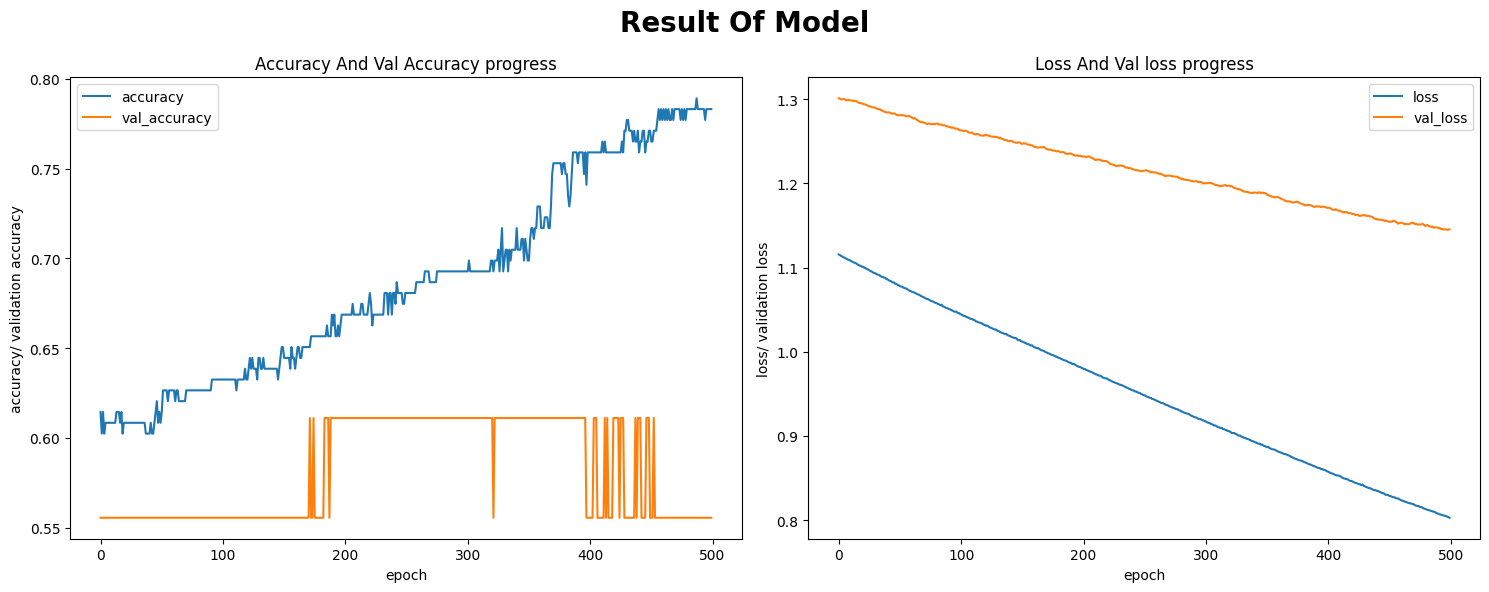

In [ ]:
#GRAFICAS DE ACCURACY Y LOSS
def Visualize_Result(acc,val_acc,loss, val_loss):
    fig, (ax1, ax2) = plt.subplots(nrows = 1,
                                   ncols = 2,
                                   figsize = (15,6),
                                   sharex =True)

    plot1 = ax1.plot(range(0, len(acc)),
                     acc,
                     label = 'accuracy')

    plot2 = ax1.plot(range(0, len(val_acc)),
                     val_acc,
                     label = 'val_accuracy')

    ax1.set(title = 'Accuracy And Val Accuracy progress',
            xlabel = 'epoch',
            ylabel = 'accuracy/ validation accuracy')

    ax1.legend()

    plot3 = ax2.plot(range(0, len(loss)),
                     loss,
                     label = 'loss')

    plot4 = ax2.plot(range(0, len(val_loss)),
                     val_loss,
                     label = 'val_loss')

    ax2.set(title = 'Loss And Val loss progress',
            xlabel = 'epoch',
            ylabel = 'loss/ validation loss')

    ax2.legend()

    fig.suptitle('Result Of Model', fontsize = 20, fontweight = 'bold')
    fig.savefig('Accuracy_Loss_figure.png')
    plt.tight_layout()
    plt.show()

visualize_result_inception = Visualize_Result(His_model_vgg_SinAum.history['accuracy'],His_model_vgg_SinAum.history['val_accuracy'], His_model_vgg_SinAum.history['loss'], His_model_vgg_SinAum.history['val_loss'])

In [ ]:
# FIT del VGG16 CON aumentación

His_model_vgg_ConAum = modelVGG16_conAum.fit(train_dataA, epochs=250, validation_data=valid_dataA)

Epoch 1/250
191/191 [==============================] - 1480s 8s/step - loss: 1.7265 - accuracy: 0.3401 - val_loss: 1.7170 - val_accuracy: 0.3421
Epoch 2/250
191/191 [==============================] - 29s 149ms/step - loss: 1.6835 - accuracy: 0.3551 - val_loss: 1.6822 - val_accuracy: 0.3566
Epoch 3/250
191/191 [==============================] - 27s 143ms/step - loss: 1.6582 - accuracy: 0.3669 - val_loss: 1.6597 - val_accuracy: 0.3658
Epoch 4/250
191/191 [==============================] - 28s 146ms/step - loss: 1.6402 - accuracy: 0.3758 - val_loss: 1.6448 - val_accuracy: 0.3645
Epoch 5/250
191/191 [==============================] - 28s 146ms/step - loss: 1.6262 - accuracy: 0.3850 - val_loss: 1.6325 - val_accuracy: 0.3776
Epoch 6/250
191/191 [==============================] - 28s 145ms/step - loss: 1.6145 - accuracy: 0.3897 - val_loss: 1.6216 - val_accuracy: 0.3895
Epoch 7/250
191/191 [==============================] - 28s 144ms/step - loss: 1.6037 - accuracy: 0.3910 - val_loss: 1.6119 - 

In [ ]:
#EVALUACIÓN DEL MODELO

loss_value , accuracy = modelVGG16_conAum.evaluate(test_data)

print('Test_loss_value = ' +str(loss_value))
print('test_accuracy = ' + str(accuracy))

print(modelVGG16_conAum.predict(test_data))

In [ ]:
#GRAFICAS DE ACCURACY Y LOSS
def Visualize_Result(acc,val_acc,loss, val_loss):
    fig, (ax1, ax2) = plt.subplots(nrows = 1,
                                   ncols = 2,
                                   figsize = (15,6),
                                   sharex =True)

    plot1 = ax1.plot(range(0, len(acc)),
                     acc,
                     label = 'accuracy')

    plot2 = ax1.plot(range(0, len(val_acc)),
                     val_acc,
                     label = 'val_accuracy')

    ax1.set(title = 'Accuracy And Val Accuracy progress',
            xlabel = 'epoch',
            ylabel = 'accuracy/ validation accuracy')

    ax1.legend()

    plot3 = ax2.plot(range(0, len(loss)),
                     loss,
                     label = 'loss')

    plot4 = ax2.plot(range(0, len(val_loss)),
                     val_loss,
                     label = 'val_loss')

    ax2.set(title = 'Loss And Val loss progress',
            xlabel = 'epoch',
            ylabel = 'loss/ validation loss')

    ax2.legend()

    fig.suptitle('Result Of Model', fontsize = 20, fontweight = 'bold')
    fig.savefig('Accuracy_Loss_figure.png')
    plt.tight_layout()
    plt.show()

visualize_result_inception = Visualize_Result(His_model_vgg_ConAum.history['accuracy'],His_model_vgg_ConAum.history['val_accuracy'], His_model_vgg_ConAum.history['loss'], His_model_vgg_ConAum.history['val_loss'])

###Fit ResNet50

In [ ]:
# FIT de ResNet50 SIN aumentación

His_model_ResNet50_ConAum = modelRes_sinAum.fit_generator(
    train_data,
    epochs=1000,
    validation_data=valid_data, verbose = 1)

Epoch 1/1000


<ipython-input-28-212036cbeaf7>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  His_model_ResNet50_ConAum = modelRes_sinAum.fit_generator(


6/6 [==============================] - 1s 162ms/step - loss: 0.2348 - accuracy: 0.9217 - val_loss: 2.3081 - val_accuracy: 0.3333
Epoch 2/1000
6/6 [==============================] - 1s 124ms/step - loss: 0.2883 - accuracy: 0.9217 - val_loss: 2.3945 - val_accuracy: 0.3333
Epoch 3/1000
6/6 [==============================] - 1s 138ms/step - loss: 0.2854 - accuracy: 0.9096 - val_loss: 2.1728 - val_accuracy: 0.3333
Epoch 4/1000
6/6 [==============================] - 1s 150ms/step - loss: 0.3045 - accuracy: 0.9096 - val_loss: 2.4821 - val_accuracy: 0.3333
Epoch 5/1000
6/6 [==============================] - 1s 137ms/step - loss: 0.2227 - accuracy: 0.9157 - val_loss: 2.6672 - val_accuracy: 0.3333
Epoch 6/1000
6/6 [==============================] - 1s 142ms/step - loss: 0.1912 - accuracy: 0.9337 - val_loss: 2.6007 - val_accuracy: 0.3333
Epoch 7/1000
6/6 [==============================] - 1s 171ms/step - loss: 0.1927 - accuracy: 0.9157 - val_loss: 2.5761 - val_accuracy: 0.3333
Epoch 8/1000
6/6 [=

In [ ]:
#EVALUACIÓN DEL MODELO

loss_value , accuracy = modelRes_sinAum.evaluate(test_data)

print('Test_loss_value = ' +str(loss_value))
print('test_accuracy = ' + str(accuracy))

print(modelRes_sinAum.predict(test_data))

1/1 [==============================] - 0s 180ms/step - loss: 4.8712 - accuracy: 0.3333
Test_loss_value = 4.871169090270996
test_accuracy = 0.3333333432674408
1/1 [==============================] - 1s 1s/step
[[3.13669375e-07 4.71418911e-11 5.18028287e-10 9.99999642e-01
  1.29112376e-09 5.38923637e-12 2.50040516e-10 1.31783445e-10]
 [1.20962737e-03 2.86408630e-03 2.29683264e-05 9.95902002e-01
  1.19340916e-06 1.63732111e-07 2.17637410e-08 3.16580255e-08]
 [9.99672413e-01 2.05479841e-06 2.12051646e-06 3.16953752e-04
  2.50815816e-07 6.06502772e-06 1.91173982e-07 1.30745663e-08]
 [7.73664794e-07 8.54844693e-03 8.22425773e-06 3.33504766e-01
  2.50984216e-03 6.53926849e-01 3.01206304e-09 1.50109990e-03]
 [6.06813089e-09 1.49282914e-06 6.11678208e-10 9.99998450e-01
  2.04584882e-08 8.19849813e-11 5.44797118e-13 2.93929950e-11]
 [1.21711499e-04 1.26926301e-04 8.46376359e-01 2.18582043e-18
  1.53374970e-01 1.78100712e-09 2.92162839e-14 3.47449003e-08]
 [3.01184282e-05 4.37754366e-09 1.45595641

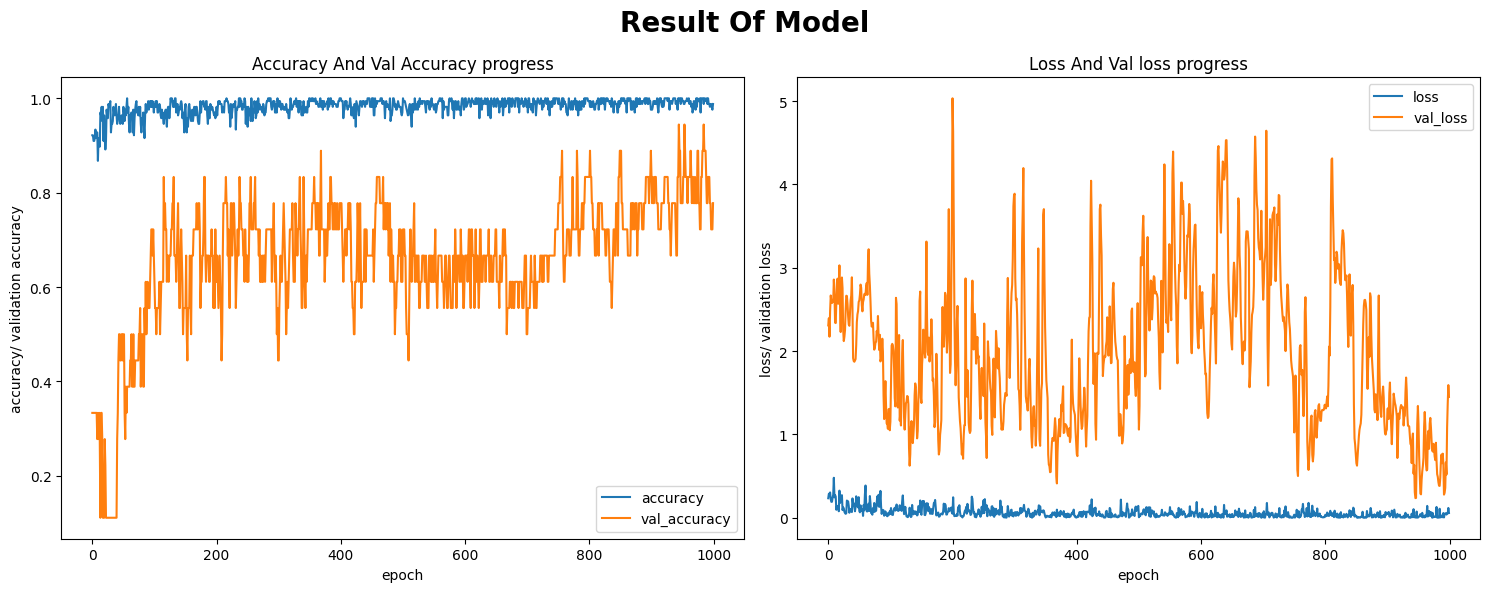

In [ ]:
#GRAFICAS DE ACCURACY Y LOSS
def Visualize_Result(acc,val_acc,loss, val_loss):
    fig, (ax1, ax2) = plt.subplots(nrows = 1,
                                   ncols = 2,
                                   figsize = (15,6),
                                   sharex =True)

    plot1 = ax1.plot(range(0, len(acc)),
                     acc,
                     label = 'accuracy')

    plot2 = ax1.plot(range(0, len(val_acc)),
                     val_acc,
                     label = 'val_accuracy')

    ax1.set(title = 'Accuracy And Val Accuracy progress',
            xlabel = 'epoch',
            ylabel = 'accuracy/ validation accuracy')

    ax1.legend()

    plot3 = ax2.plot(range(0, len(loss)),
                     loss,
                     label = 'loss')

    plot4 = ax2.plot(range(0, len(val_loss)),
                     val_loss,
                     label = 'val_loss')

    ax2.set(title = 'Loss And Val loss progress',
            xlabel = 'epoch',
            ylabel = 'loss/ validation loss')

    ax2.legend()

    fig.suptitle('Result Of Model', fontsize = 20, fontweight = 'bold')
    fig.savefig('Accuracy_Loss_figure.png')
    plt.tight_layout()
    plt.show()

visualize_result_inception_ConA = Visualize_Result(His_model_ResNet50_ConAum.history['accuracy'],His_model_ResNet50_ConAum.history['val_accuracy'], His_model_ResNet50_ConAum.history['loss'], His_model_ResNet50_ConAum.history['val_loss'])

In [ ]:
# FIT de ResNet50 CON aumentación

His_model_ResNet50_ConAum = modelRes_conAum.fit(
    train_dataA,
    epochs=500,
    validation_data=valid_dataA, verbose = 1)

###Fit AlexNet

In [ ]:
#Fit AlexNet SIN aumentación
His_model_AlexNet_SinAum = model_Alex_sinAum.fit(train_data, epochs=20, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

In [ ]:
#Fit AlexNet CON aumentación
His_model_AlexNet_ConAum = model_Alex_conAum.fit(train_dataA, epochs=20, steps_per_epoch=len(train_dataA), validation_data=valid_dataA, validation_steps=len(valid_dataA))

###Fit inception

In [ ]:
#Model Inception SIN aumentación
His_model_Inception_SinAum = model_inception_sinAum.fit(train_data, epochs=1000, batch_size=32, validation_data=valid_data)

Epoch 1/1000
6/6 [==============================] - 1s 134ms/step - loss: 9.7380e-05 - accuracy: 1.0000 - val_loss: 1.4045 - val_accuracy: 0.7222
Epoch 2/1000
6/6 [==============================] - 1s 111ms/step - loss: 9.8429e-05 - accuracy: 1.0000 - val_loss: 1.4207 - val_accuracy: 0.7222
Epoch 3/1000
6/6 [==============================] - 1s 108ms/step - loss: 8.2921e-05 - accuracy: 1.0000 - val_loss: 1.3496 - val_accuracy: 0.7222
Epoch 4/1000
6/6 [==============================] - 1s 132ms/step - loss: 5.5221e-05 - accuracy: 1.0000 - val_loss: 1.3148 - val_accuracy: 0.7222
Epoch 5/1000
6/6 [==============================] - 1s 110ms/step - loss: 7.3707e-05 - accuracy: 1.0000 - val_loss: 1.3049 - val_accuracy: 0.6667
Epoch 6/1000
6/6 [==============================] - 1s 142ms/step - loss: 1.0940e-04 - accuracy: 1.0000 - val_loss: 1.3181 - val_accuracy: 0.7222
Epoch 7/1000
6/6 [==============================] - 1s 151ms/step - loss: 9.5191e-05 - accuracy: 1.0000 - val_loss: 1.3503 -

In [ ]:
#EVALUACIÓN DEL MODELO

loss_value , accuracy = model_inception_sinAum.evaluate(test_data)

print('Test_loss_value = ' +str(loss_value))
print('test_accuracy = ' + str(accuracy))

print(model_inception_sinAum.predict(test_data))

1/1 [==============================] - 0s 155ms/step - loss: 1.9675 - accuracy: 0.6667
Test_loss_value = 1.9675401449203491
test_accuracy = 0.6666666865348816
1/1 [==============================] - 1s 1s/step
[[1.4354160e-09 2.3863115e-07 7.6420779e-12 9.9954754e-01 4.5221014e-04
  3.7510807e-11 7.8904897e-11 1.3252493e-11]
 [7.9376422e-11 2.2411038e-04 5.2061370e-08 9.9977583e-01 1.1515481e-10
  9.5816169e-08 4.9316030e-11 2.4139094e-11]
 [6.2058600e-05 9.9993408e-01 2.5532499e-08 5.8550449e-07 4.7829646e-11
  1.3687622e-07 4.0535031e-10 3.0770861e-06]
 [3.8336370e-13 1.0000000e+00 6.4614347e-17 4.5140709e-13 4.6618989e-19
  2.2856089e-17 5.4197424e-15 9.6556183e-15]
 [4.8286215e-04 5.2921867e-01 1.1539879e-04 4.2254755e-01 4.7529563e-02
  1.0407371e-04 1.8008891e-06 4.3751026e-08]
 [5.8764275e-03 1.3168662e-07 4.8692186e-06 9.9409640e-01 1.7425191e-05
  4.7713797e-06 4.9009468e-09 2.4564339e-09]
 [3.8204400e-04 5.7319641e-02 3.7189890e-02 2.3382711e-01 8.6533818e-03
  6.6262037e-01 4

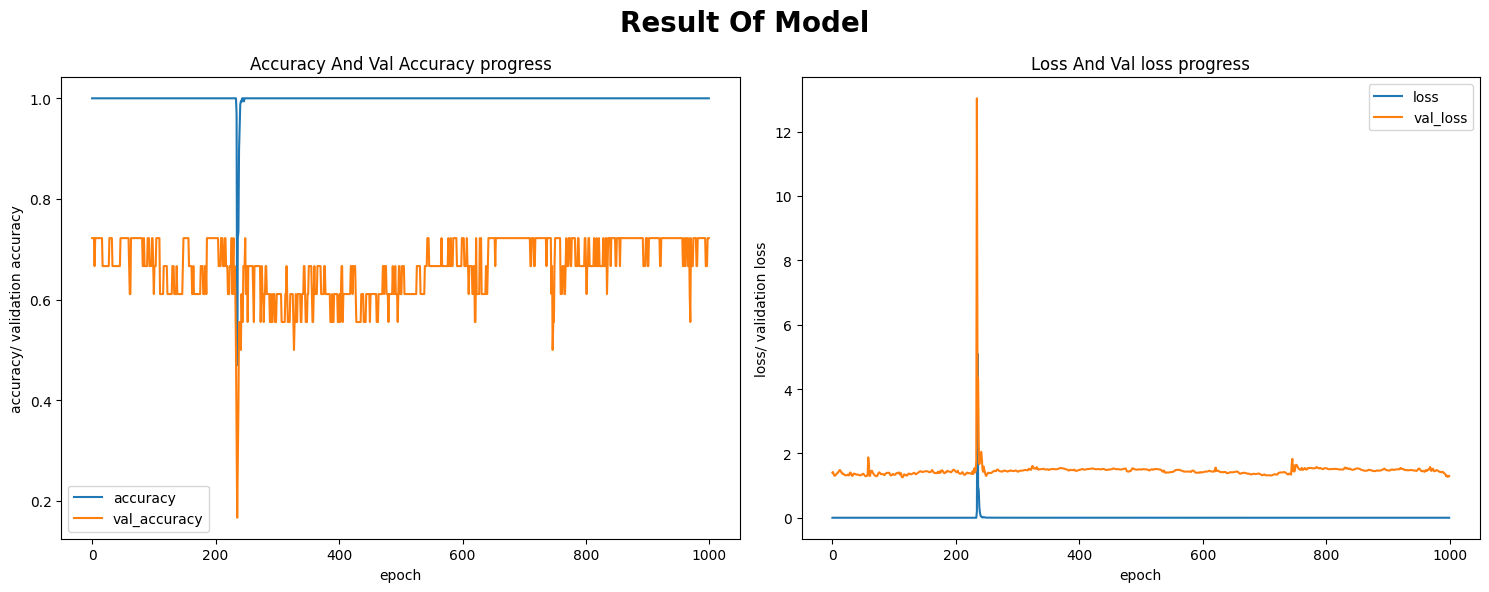

In [ ]:
#GRAFICAS DE ACCURACY Y LOSS
def Visualize_Result(acc,val_acc,loss, val_loss):
    fig, (ax1, ax2) = plt.subplots(nrows = 1,
                                   ncols = 2,
                                   figsize = (15,6),
                                   sharex =True)

    plot1 = ax1.plot(range(0, len(acc)),
                     acc,
                     label = 'accuracy')

    plot2 = ax1.plot(range(0, len(val_acc)),
                     val_acc,
                     label = 'val_accuracy')

    ax1.set(title = 'Accuracy And Val Accuracy progress',
            xlabel = 'epoch',
            ylabel = 'accuracy/ validation accuracy')

    ax1.legend()

    plot3 = ax2.plot(range(0, len(loss)),
                     loss,
                     label = 'loss')

    plot4 = ax2.plot(range(0, len(val_loss)),
                     val_loss,
                     label = 'val_loss')

    ax2.set(title = 'Loss And Val loss progress',
            xlabel = 'epoch',
            ylabel = 'loss/ validation loss')

    ax2.legend()

    fig.suptitle('Result Of Model', fontsize = 20, fontweight = 'bold')
    fig.savefig('Accuracy_Loss_figure.png')
    plt.tight_layout()
    plt.show()

visualize_result_inception = Visualize_Result(His_model_Inception_SinAum.history['accuracy'],His_model_Inception_SinAum.history['val_accuracy'], His_model_Inception_SinAum.history['loss'], His_model_Inception_SinAum.history['val_loss'])

In [ ]:
#guardar modelo
model_inception_sinAum.save('model_inception_sinAum.h5')

In [ ]:
#Model Inception CON aumentación
His_model_Inception_ConAum = model_inception_conAum.fit(train_dataA, epochs=250, batch_size=32, validation_data=valid_dataA)

Epoch 1/250
191/191 [==============================] - 2169s 11s/step - loss: 1.5222 - accuracy: 0.4659 - val_loss: 1.1768 - val_accuracy: 0.5329
Epoch 2/250
191/191 [==============================] - 21s 110ms/step - loss: 0.9356 - accuracy: 0.6393 - val_loss: 0.9662 - val_accuracy: 0.6158
Epoch 3/250
191/191 [==============================] - 22s 117ms/step - loss: 0.7733 - accuracy: 0.7045 - val_loss: 0.6904 - val_accuracy: 0.7408
Epoch 4/250
191/191 [==============================] - 21s 110ms/step - loss: 0.6229 - accuracy: 0.7634 - val_loss: 0.6271 - val_accuracy: 0.7592
Epoch 5/250
191/191 [==============================] - 22s 115ms/step - loss: 0.5138 - accuracy: 0.8092 - val_loss: 0.5156 - val_accuracy: 0.8171
Epoch 6/250
191/191 [==============================] - 22s 113ms/step - loss: 0.4261 - accuracy: 0.8443 - val_loss: 0.6140 - val_accuracy: 0.7592
Epoch 7/250
191/191 [==============================] - 23s 118ms/step - loss: 0.3594 - accuracy: 0.8694 - val_loss: 0.4204 -

In [ ]:
#EVALUACIÓN DEL MODELO

loss_valueA , accuracyA = model_inception_conAum.evaluate(test_dataA)

print('Test_loss_value = ' +str(loss_valueA))
print('test_accuracy = ' + str(accuracyA))

print(model_inception_conAum.predict(test_dataA))

24/24 [==============================] - 230s 10s/step - loss: 0.2691 - accuracy: 0.9632
Test_loss_value = 0.26906508207321167
test_accuracy = 0.9631578922271729
24/24 [==============================] - 4s 116ms/step
[[4.2421802e-06 1.2431621e-02 7.2010939e-12 ... 7.1458478e-15
  2.9499462e-11 8.7976390e-20]
 [3.8869368e-12 3.2345808e-13 2.9170686e-15 ... 2.0663160e-14
  9.5318749e-24 5.1259969e-18]
 [2.1285518e-13 9.9999917e-01 5.4292916e-32 ... 2.6947740e-20
  1.5763962e-24 5.6031978e-24]
 ...
 [3.3622158e-16 2.5666127e-11 3.9828267e-16 ... 1.4480549e-13
  6.6996005e-19 1.2112726e-11]
 [1.8319441e-14 1.2374453e-11 1.2643162e-15 ... 1.1445940e-11
  8.8345986e-13 2.6914867e-14]
 [4.2608904e-15 4.8324152e-18 4.7958967e-22 ... 1.3650288e-24
  1.0562008e-18 1.6603162e-29]]


In [ ]:
#guardar modelo
model_inception_conAum.save('model_inception_conAum.h5')

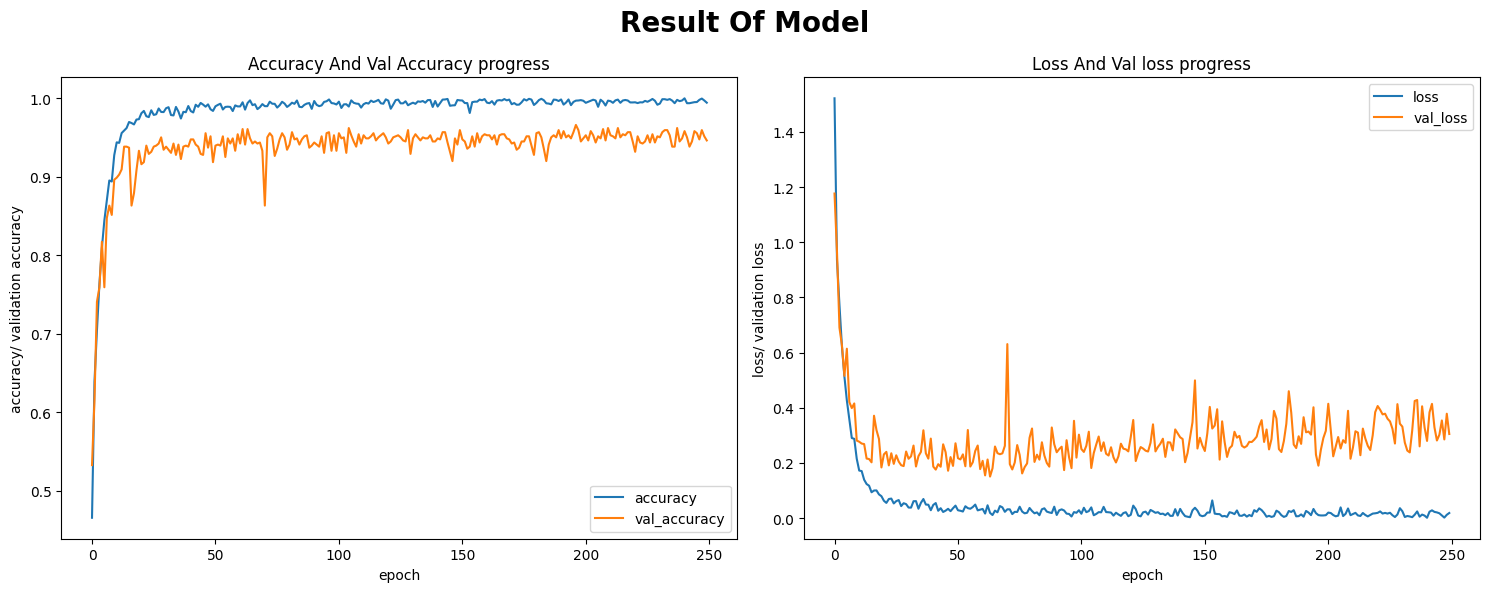

In [ ]:
#GRAFICAS DE ACCURACY Y LOSS
def Visualize_Result(acc,val_acc,loss, val_loss):
    fig, (ax1, ax2) = plt.subplots(nrows = 1,
                                   ncols = 2,
                                   figsize = (15,6),
                                   sharex =True)

    plot1 = ax1.plot(range(0, len(acc)),
                     acc,
                     label = 'accuracy')

    plot2 = ax1.plot(range(0, len(val_acc)),
                     val_acc,
                     label = 'val_accuracy')

    ax1.set(title = 'Accuracy And Val Accuracy progress',
            xlabel = 'epoch',
            ylabel = 'accuracy/ validation accuracy')

    ax1.legend()

    plot3 = ax2.plot(range(0, len(loss)),
                     loss,
                     label = 'loss')

    plot4 = ax2.plot(range(0, len(val_loss)),
                     val_loss,
                     label = 'val_loss')

    ax2.set(title = 'Loss And Val loss progress',
            xlabel = 'epoch',
            ylabel = 'loss/ validation loss')

    ax2.legend()

    fig.suptitle('Result Of Model', fontsize = 20, fontweight = 'bold')
    fig.savefig('Accuracy_Loss_figure.png')
    plt.tight_layout()
    plt.show()

visualize_result_inception_ConA = Visualize_Result(His_model_Inception_ConAum.history['accuracy'],His_model_Inception_ConAum.history['val_accuracy'], His_model_Inception_ConAum.history['loss'], His_model_Inception_ConAum.history['val_loss'])

###InceptionResNet_v2

In [ ]:
#Sin aumentación
His_model_inceptionResNetV2_sinaum = model_inceptionResNetV2_sinAum.fit(train_data, epochs=5, batch_size=32, validation_data=valid_data)

Epoch 1/5
6/6 [==============================] - 70s 9s/step - loss: 4.4499 - accuracy: 0.2229 - val_loss: 3.6779 - val_accuracy: 0.3889
Epoch 2/5
6/6 [==============================] - 1s 210ms/step - loss: 2.5533 - accuracy: 0.2952 - val_loss: 2.2158 - val_accuracy: 0.2222
Epoch 3/5
6/6 [==============================] - 1s 182ms/step - loss: 1.9399 - accuracy: 0.3735 - val_loss: 2.0240 - val_accuracy: 0.2778
Epoch 4/5
6/6 [==============================] - 1s 177ms/step - loss: 1.5718 - accuracy: 0.3916 - val_loss: 1.6046 - val_accuracy: 0.4444
Epoch 5/5
6/6 [==============================] - 1s 181ms/step - loss: 1.2812 - accuracy: 0.5723 - val_loss: 1.5734 - val_accuracy: 0.3333


In [ ]:
#Con aumentación
His_model_inceptionResNetV2_conaum = model_inceptionResNetV2_conAum.fit(train_dataA, epochs=100, batch_size=32, validation_data=valid_dataA)

Epoch 1/100
191/191 [==============================] - 1687s 9s/step - loss: 1.4725 - accuracy: 0.4838 - val_loss: 1.0338 - val_accuracy: 0.5987
Epoch 2/100
191/191 [==============================] - 36s 188ms/step - loss: 0.9554 - accuracy: 0.6357 - val_loss: 0.8465 - val_accuracy: 0.6868
Epoch 3/100
191/191 [==============================] - 37s 194ms/step - loss: 0.7874 - accuracy: 0.6965 - val_loss: 0.7917 - val_accuracy: 0.6961
Epoch 4/100
191/191 [==============================] - 39s 201ms/step - loss: 0.6762 - accuracy: 0.7398 - val_loss: 0.5316 - val_accuracy: 0.8132
Epoch 5/100
191/191 [==============================] - 38s 201ms/step - loss: 0.5731 - accuracy: 0.7797 - val_loss: 0.4849 - val_accuracy: 0.8224
Epoch 6/100
191/191 [==============================] - 37s 196ms/step - loss: 0.5089 - accuracy: 0.8025 - val_loss: 0.5416 - val_accuracy: 0.7882
Epoch 7/100
191/191 [==============================] - 38s 196ms/step - loss: 0.4545 - accuracy: 0.8261 - val_loss: 0.3924 - 

In [ ]:
#EVALUACIÓN DEL MODELO

loss_value , accuracy = model_inceptionResNetV2_sinAum.evaluate(test_data)

print('Test_loss_value = ' +str(loss_value))
print('test_accuracy = ' + str(accuracy))

print(model_inceptionResNetV2_sinAum.predict(test_data))

1/1 [==============================] - 1s 1s/step - loss: 7.6897e-04 - accuracy: 1.0000
Test_loss_value = 0.0007689716294407845
test_accuracy = 1.0
1/1 [==============================] - 3s 3s/step
[[1.99265713e-07 2.52361931e-09 5.67102084e-13 9.99997497e-01
  2.20822471e-06 2.44738629e-08 1.37850690e-14 5.04482003e-26]
 [5.16343088e-12 1.00000000e+00 5.07342747e-21 1.51085958e-13
  1.45212429e-08 1.66887011e-21 2.62619299e-13 3.90257495e-31]
 [1.00000000e+00 2.61838763e-15 3.98067900e-19 6.46176152e-15
  6.19799568e-12 9.92636187e-20 5.02127625e-18 6.47211955e-31]
 [9.89873201e-12 1.25960069e-04 3.60877010e-21 9.99873161e-01
  1.04567491e-13 8.42028044e-07 4.92747176e-09 1.83795231e-17]
 [5.20910191e-07 1.88738447e-08 3.70377947e-12 9.99995589e-01
  3.78862364e-06 1.72413261e-09 1.44965417e-09 9.34315056e-11]
 [1.00000000e+00 1.72417842e-14 4.15315081e-13 3.57719713e-12
  5.35833600e-08 2.00101670e-18 6.05063319e-23 4.03013169e-37]
 [2.09888298e-04 3.35913582e-14 3.93770371e-15 1.825

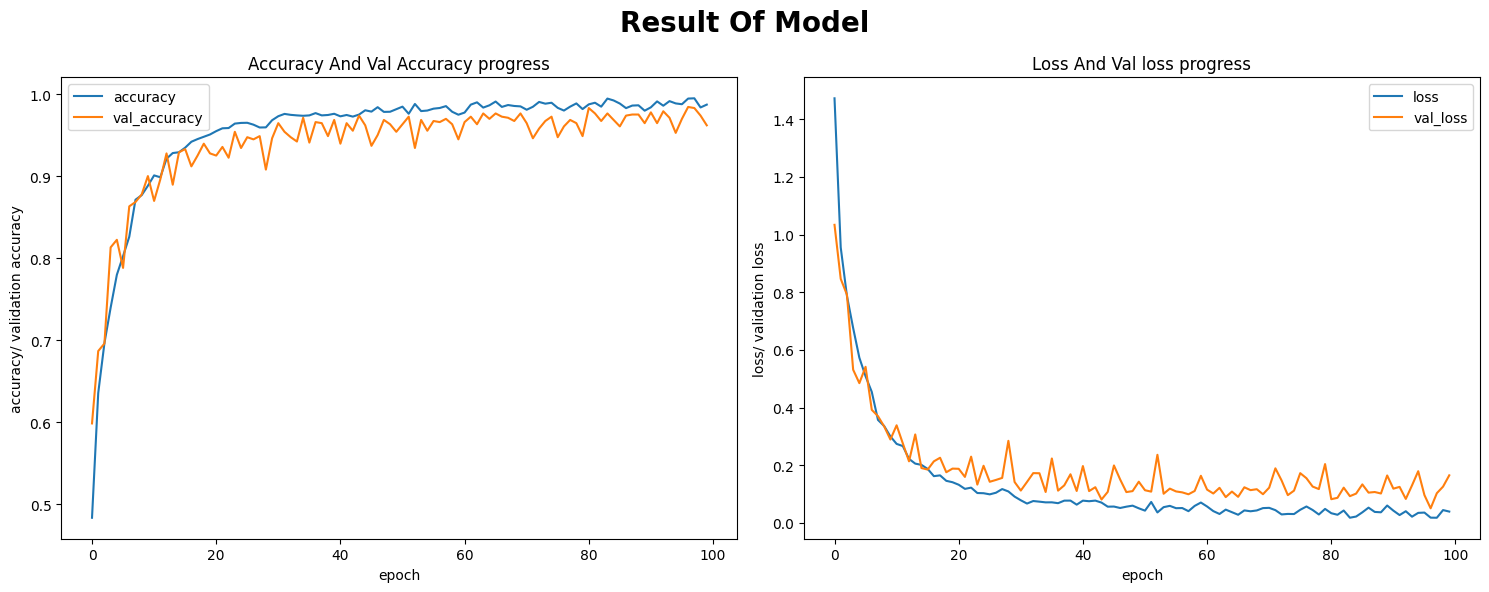

In [ ]:
#GRAFICAS DE ACCURACY Y LOSS
def Visualize_Result(acc,val_acc,loss, val_loss):
    fig, (ax1, ax2) = plt.subplots(nrows = 1,
                                   ncols = 2,
                                   figsize = (15,6),
                                   sharex =True)

    plot1 = ax1.plot(range(0, len(acc)),
                     acc,
                     label = 'accuracy')

    plot2 = ax1.plot(range(0, len(val_acc)),
                     val_acc,
                     label = 'val_accuracy')

    ax1.set(title = 'Accuracy And Val Accuracy progress',
            xlabel = 'epoch',
            ylabel = 'accuracy/ validation accuracy')

    ax1.legend()

    plot3 = ax2.plot(range(0, len(loss)),
                     loss,
                     label = 'loss')

    plot4 = ax2.plot(range(0, len(val_loss)),
                     val_loss,
                     label = 'val_loss')

    ax2.set(title = 'Loss And Val loss progress',
            xlabel = 'epoch',
            ylabel = 'loss/ validation loss')

    ax2.legend()

    fig.suptitle('Result Of Model', fontsize = 20, fontweight = 'bold')
    fig.savefig('Accuracy_Loss_figure.png')
    plt.tight_layout()
    plt.show()

visualize_result_inception_ConA = Visualize_Result(His_model_inceptionResNetV2_conaum.history['accuracy'],His_model_inceptionResNetV2_conaum.history['val_accuracy'], His_model_inceptionResNetV2_conaum.history['loss'], His_model_inceptionResNetV2_conaum.history['val_loss'])